In [59]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.model_selection import KFold
from statsmodels.stats.multitest import multipletests
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


ACTN2


/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


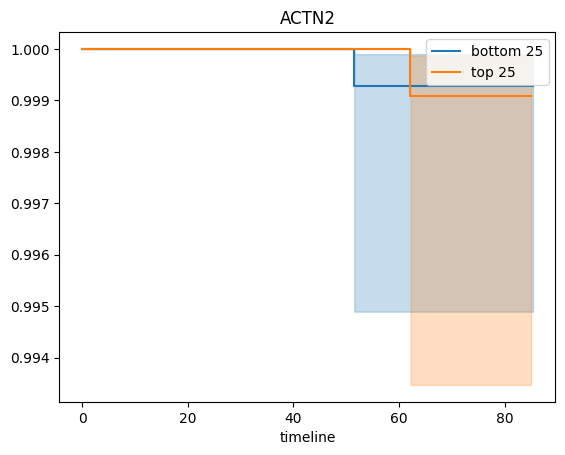

<Figure size 640x480 with 0 Axes>

ALPK3


/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


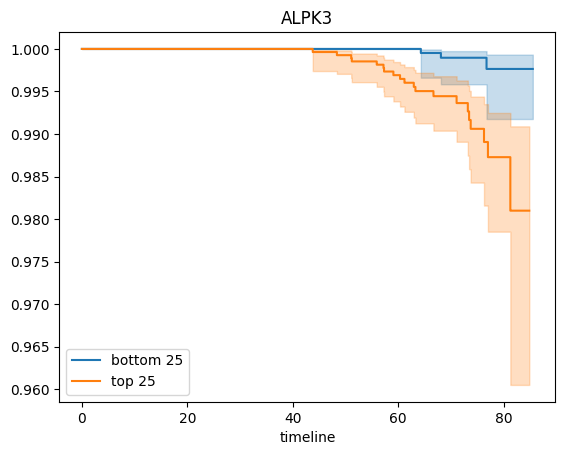

<Figure size 640x480 with 0 Axes>

FLNC


/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


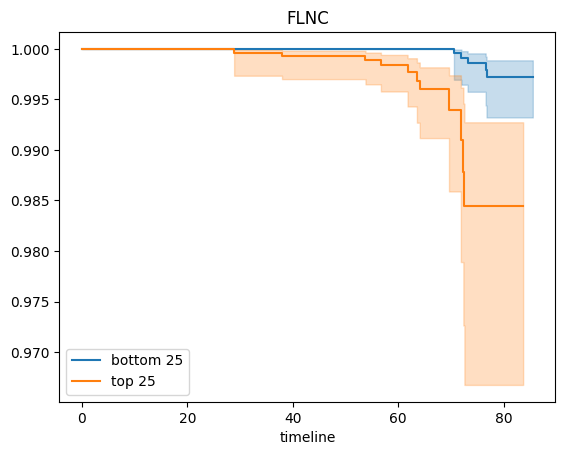

<Figure size 640x480 with 0 Axes>

MYBPC3


/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


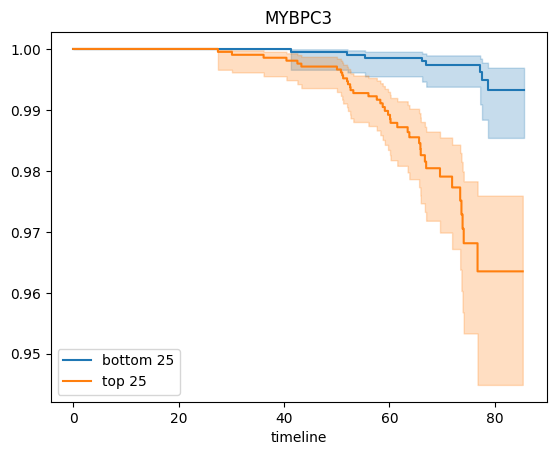

<Figure size 640x480 with 0 Axes>

MYH6


/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


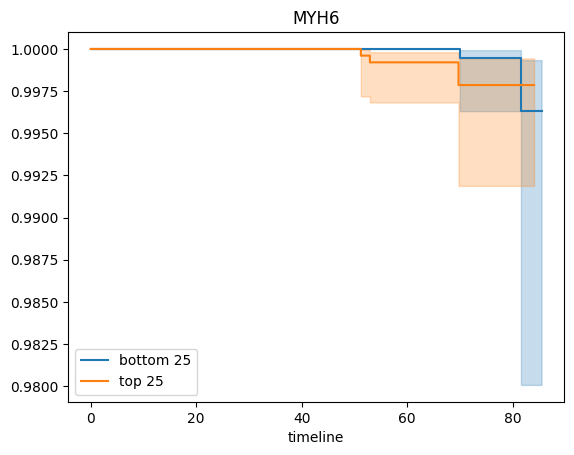

<Figure size 640x480 with 0 Axes>

MYH7


/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/uriel/miniconda3/envs/default_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


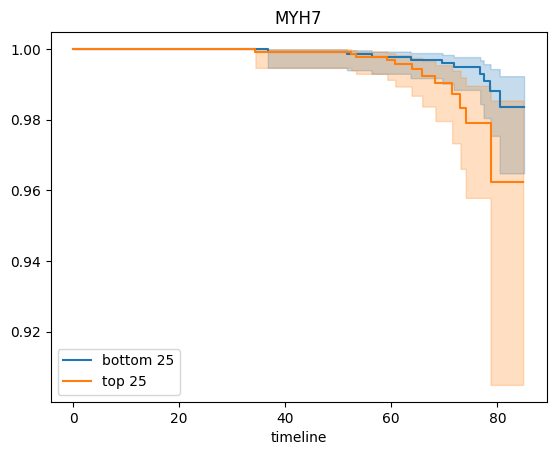

<Figure size 640x480 with 0 Axes>

In [63]:
genes = ['ACTN2', 'ALPK3', 'FLNC','MYBPC3','MYH6','MYH7']
p_vals = {}
def cross_val(gene):

    cph = CoxPHFitter()
    kf = KFold(n_splits=5, shuffle = True)

    # read in file
    file_name=gene+'.csv'
    phenotypic_data = pd.read_csv("/Users/uriel/Downloads/work_temp/gnomadAI_lifelines/"+file_name, dtype={
            'is_family_hist':'boolean',
            'is_hcm':'boolean'
            })
    file_name=gene+'.csv'
    variant_data = pd.read_csv("/Users/uriel/Downloads/work_temp/variant_files/"+file_name)
    variant_data = variant_data[['Name']]
    variant_data['var_index'] = variant_data.index
    phenotypic_data = variant_data.merge(phenotypic_data, how="outer")
    phenotypic_data = phenotypic_data.dropna()
    phenotypic_data.set_index("var_index")

    
    
    phenotypic_data = phenotypic_data.drop(["Name", "index"], axis = 1)
    phenotypic_data.loc[phenotypic_data['deleterious'] == 1, 'am_pathogenicity'] = 1
    phenotypic_data = phenotypic_data.dropna()



    phenotypic_data = phenotypic_data[(phenotypic_data['missense_variant'] == True) | (phenotypic_data['deleterious'] == True)]
    phenotypic_data = phenotypic_data.drop(['principal_component_2','principal_component_3', 'principal_component_5', 'principal_component_6', 'principal_component_7', 'principal_component_8', 'principal_component_9', 'principal_component_10','CADD_raw', 'phyloP100way_vertebrate', 'GERP++_RS','trv', 'ds_ag', 'ds_al', 'ds_dg', 'ds_al', 'ds_dl', 'deleterious', 'synonymous_variant', 'missense_variant'], axis = 1)

    kf = KFold(n_splits=5)
    hazard_scores = []


    # cross validation: split up phenotypic data file based on variant file index
    for train_idx, test_idx in kf.split(variant_data):
        train = phenotypic_data[phenotypic_data['var_index'].isin(train_idx)]
        test = phenotypic_data[phenotypic_data['var_index'].isin(test_idx)]

        train = train.drop(['var_index'], axis=1)
        test = test.drop(['var_index'], axis=1)

        # fit CPH and add hazard scores
        cph.fit(train, duration_col="duration", event_col="is_hcm", fit_options = {"step_size":0.1})
        hazard_scores_fold = cph.predict_partial_hazard(test)
        hazard_scores.extend(hazard_scores_fold)
    
    phenotypic_data = phenotypic_data.drop(["var_index"], axis = 1)


    percentiles = np.percentile(hazard_scores, [25, 75])
    phenotypic_data['hazard'] = hazard_scores


    bottom_25 = phenotypic_data[phenotypic_data['hazard'] < percentiles[0]]
    top_25 = phenotypic_data[phenotypic_data['hazard'] > percentiles[1]]

    bottom_25 = bottom_25.assign(is_highest=0)
    top_25 = top_25.assign(is_highest=1)

    df = pd.concat([bottom_25, top_25], keys=['low', 'high'])[['is_hcm', 'duration', 'is_highest']]

    cph = CoxPHFitter()
    cph.fit(df, duration_col="duration", event_col="is_hcm", fit_options = {"step_size":0.001})
    p_vals.update({gene:cph.summary.loc["is_highest","p"]})


    kmf_lowest_25_variant = KaplanMeierFitter()
    kmf_lowest_25_variant.fit(durations=bottom_25['duration'], event_observed=bottom_25['is_hcm'], label = 'bottom 25')
    kmf_lowest_25_variant.plot_survival_function()


    kmf_highest_25_variant = KaplanMeierFitter()
    kmf_highest_25_variant.fit(durations=top_25['duration'], event_observed=top_25['is_hcm'], label = 'top 25')
    kmf_highest_25_variant.plot_survival_function()
       


    plt.title(gene)
    plt.figure()







for gene in genes:
    print(gene)
    cross_val(gene)
    plt.show()



In [64]:
p_adjusted = multipletests(list(p_vals.values()), alpha=0.05, method='bonferroni')
updated_dict = {key: new_p_val for key, new_p_val in zip(p_vals.keys(), p_adjusted[1])}
print("P-values: ", updated_dict)


P-values:  {'ACTN2': 1.0, 'ALPK3': 0.006643805299663573, 'FLNC': 0.000581597123252754, 'MYBPC3': 1.3889628546083205e-06, 'MYH6': 1.0, 'MYH7': 0.1654558334159511}
